# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [4]:
!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
!unzip bus-breakdown-and-delays.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays
License(s): unknown
bus-breakdown-and-delays.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bus-breakdown-and-delays.zip
replace Bus_Breakdown_and_Delays.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Bus_Breakdown_and_Delays.csv  


## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [38]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [36]:
df.tail()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,x,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,x,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,20 MINS,0,Yes,Yes,No,05/25/2017 04:30:00 PM,x,05/25/2017 04:30:07 PM,Breakdown,School-Age
147971,2016-2017,1353046,Project Read PM Run,2530,K617,Other,21436,05/25/2017 04:36:00 PM,05/25/2017 04:37:00 PM,Brooklyn,...,45min,7,Yes,Yes,Yes,05/25/2017 04:37:00 PM,x,05/25/2017 04:37:37 PM,Running Late,School-Age


In [39]:
df.shape

(147972, 21)

In [40]:
df.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [62]:
df['Breakdown_or_Running_Late'].value_counts()

,count
Breakdown_or_Running_Late,
1,130618
0,17075


In [63]:
#Incident_Number
df['Incident_Number'].value_counts()

,count
Incident_Number,
4651,142189
4646,77
4648,65
3582,24
3619,16
...,...
29,1
658,1
1669,1


In [43]:
df.dtypes

,0
School_Year,object
Busbreakdown_ID,int64
Run_Type,object
Bus_No,object
Route_Number,object
Reason,object
Schools_Serviced,object
Occurred_On,object
Created_On,object
Boro,object


In [44]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [ ]:
df.info()

<Axes: >

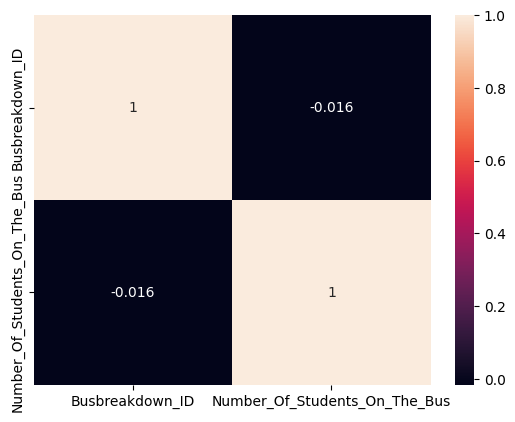

In [51]:
import seaborn as sns
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

array([[<Axes: title={'center': 'Busbreakdown_ID'}>,
        <Axes: title={'center': 'Number_Of_Students_On_The_Bus'}>]],
      dtype=object)

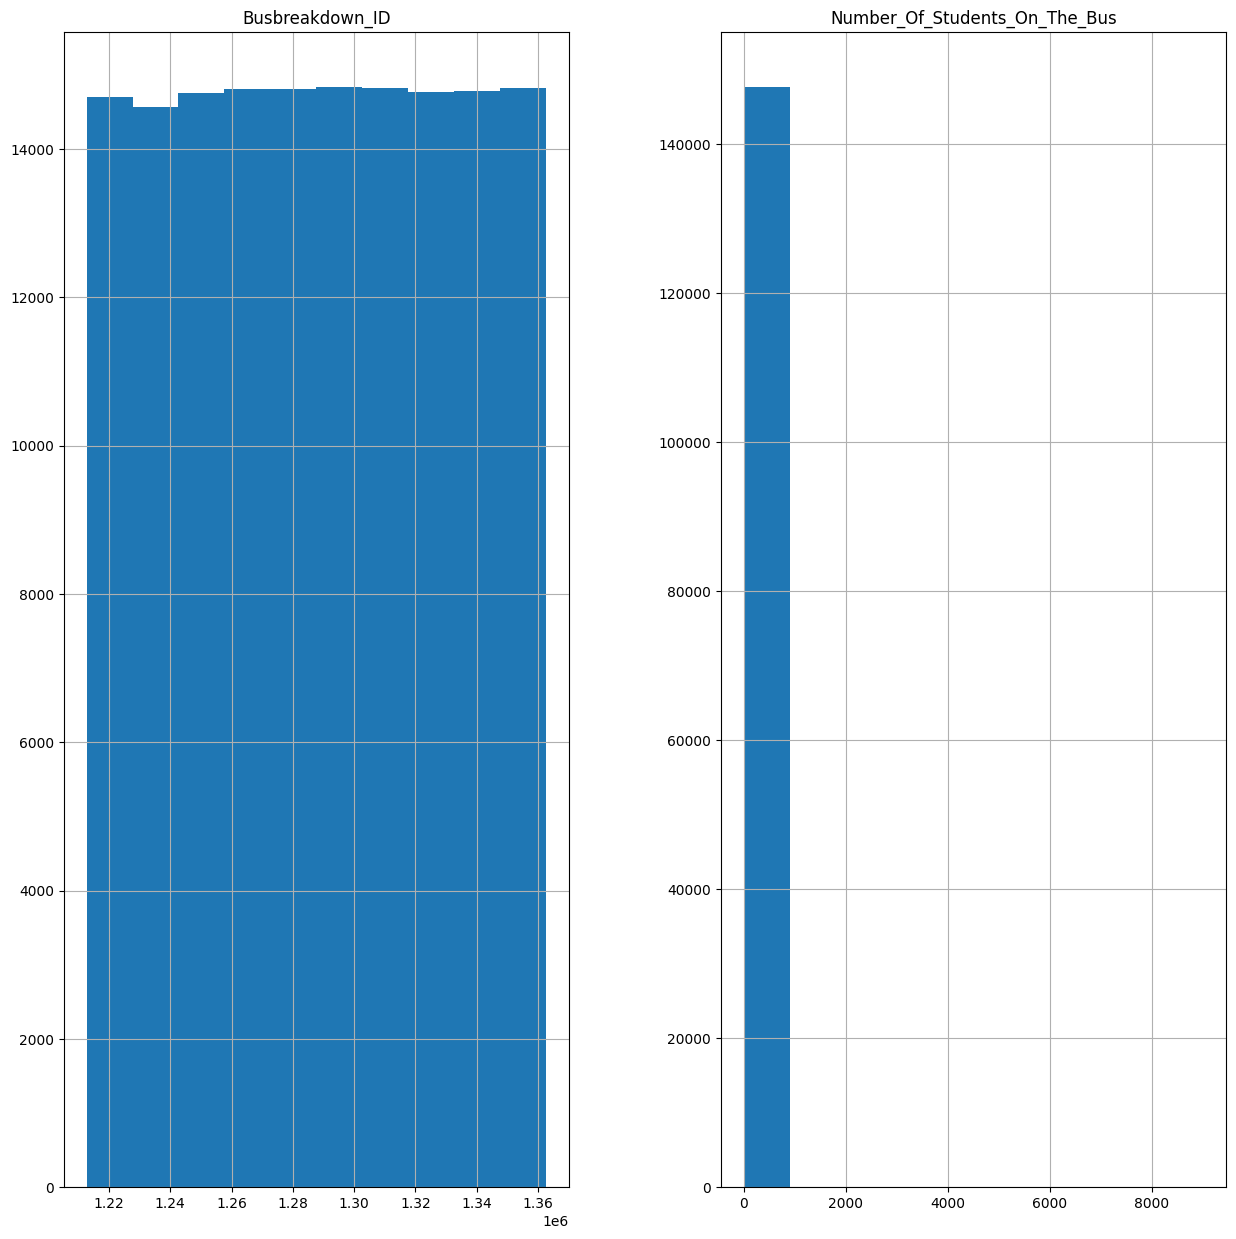

In [52]:
# Distribution of features
df.hist(figsize=(15,15))

In [45]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


I will handling massing values below

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [46]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [47]:
# fill the null values with the mode for these columns to prevent the lose of the data

df['Incident_Number'].fillna(df['Incident_Number'].mode()[0], inplace=True)

df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode()[0], inplace=True)

df['Boro'].fillna(df['Boro'].mode()[0], inplace=True)

In [48]:
# the remainders null value i will drop it
df.dropna(inplace=True)

In [49]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147693 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147693 non-null  object
 1   Busbreakdown_ID                  147693 non-null  int64 
 2   Run_Type                         147693 non-null  object
 3   Bus_No                           147693 non-null  object
 4   Route_Number                     147693 non-null  object
 5   Reason                           147693 non-null  object
 6   Schools_Serviced                 147693 non-null  object
 7   Occurred_On                      147693 non-null  object
 8   Created_On                       147693 non-null  object
 9   Boro                             147693 non-null  object
 10  Bus_Company_Name                 147693 non-null  object
 11  How_Long_Delayed                 147693 non-null  object
 12  Number_Of_Students_On

In [54]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [55]:
from sklearn.model_selection import train_test_split

x = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [64]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [65]:
his = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9188 - loss: 0.2132 - val_accuracy: 0.9610 - val_loss: 0.0978
Epoch 2/10
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9645 - loss: 0.0902 - val_accuracy: 0.9710 - val_loss: 0.0738
Epoch 3/10
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9743 - loss: 0.0700 - val_accuracy: 0.9749 - val_loss: 0.0663
Epoch 4/10
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9774 - loss: 0.0618 - val_accuracy: 0.9787 - val_loss: 0.0578
Epoch 5/10
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9796 - loss: 0.0572 - val_accuracy: 0.9791 - val_loss: 0.0547
Epoch 6/10
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9809 - loss: 0.0525 - val_accuracy: 0.9812 - val_loss: 0.0533
Epoch 7/10
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9824 - loss: 0.0481 - val_accuracy: 0.9830 - val_loss: 0.0488
Epoch 8/10
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9828 - loss: 0.051

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [67]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

924/924 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.9836148820203798


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [69]:
import numpy as np
predicted_classes = np.argmax(y_pred, axis=1)

In [71]:
predicted_classes

array([0, 0, 0, ..., 0, 0, 0])

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

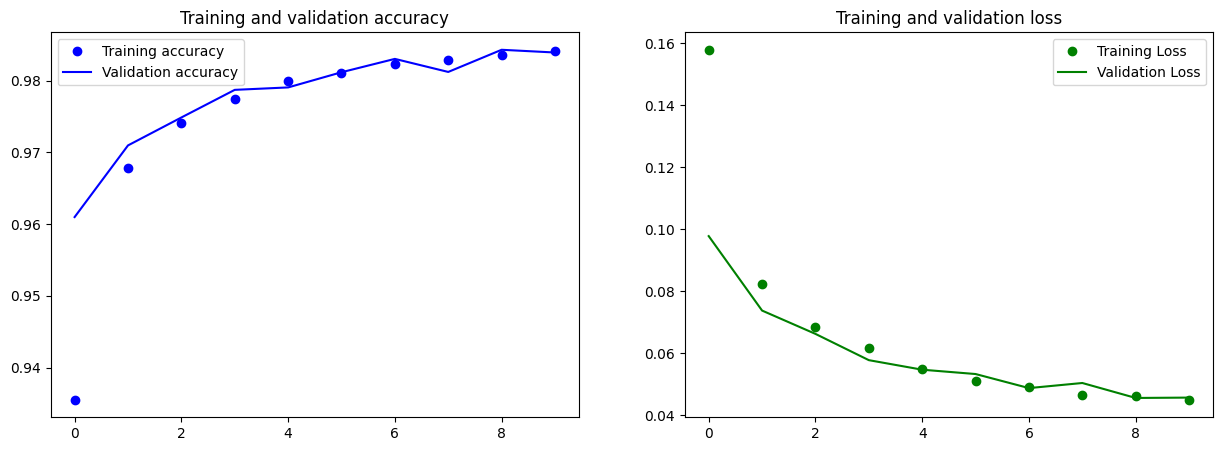

In [70]:
import matplotlib.pyplot as plt

acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

## Save the Model
Save the trained model for submission.

In [74]:
model.save('MYmodel.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

**Data Preprocessing:**  
Data preprocessing helps reduce training time and improve prediction accuracy.

**Model Architecture:**  
My ANN model consists of 2 dense layers with 64 and 32 neurons, both using ReLU activation, and a final layer with sigmoid activation.

**Training Process:**  
I used the Adam optimizer, which is generally effective, with a batch size of 32 and 10 epochs, resulting in good outcomes.

**Loss Function and Metrics:**  
The loss function is 'binary_crossentropy' since this is a binary classification task, and accuracy is the chosen metric.

**Regularization Techniques:**  
No additional regularization techniques were needed, as the model achieved good results without them.

**Model Evaluation:**  
I evaluated the model using the test data and obtained favorable results.

**Overfitting and Underfitting:**  
The accuracy and loss for both training and validation data are close, indicating no overfitting. Early stopping could be used as an additional safeguard.


------

Thank YOU ⛹